In [7]:
# Plot results generated by generate_graphs.sh
# assumes that all differential unitigs are in a folder named
# by the value of k used

import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np
import matplotlib as mpl
import sys
import subprocess

mpl.rcParams.update(mpl.rcParamsDefault)
import scipy.stats

plt.rc('font', family='sans-serif')#, serif='Times')
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=11)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': False,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

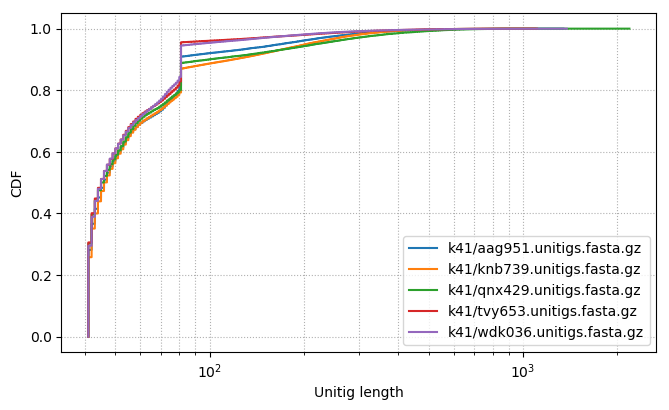

In [21]:
#ks = [19, 27, 31, 41]
ks = [41]
fracs = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]

width = 3.487 * 1.5 * 1.3
height = width / 1.618

fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.grid(linestyle=':', which="both")

for k in ks: 
    len_array = []
    for f in sorted(glob.glob('k' + str(k) + "/*.unitigs.fasta.gz")):
        lines = [a.decode().strip() for a in gzip.open(f, "rb")]
        seqs = lines[slice(1, len(lines), 2)] 
        lens = np.array(sorted([len(a) for a in seqs]))
        ax.semilogx(lens, np.arange(1, len(lens) + 1) / len(lens), label=f)

ax.set_xlabel("Unitig length")
ax.set_ylabel("CDF")
ax.legend()
plt.tight_layout()